In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [5]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['date']

0      2015-05-27 00:00:00+00:00
1      2015-05-28 00:00:00+00:00
2      2015-05-29 00:00:00+00:00
3      2015-06-01 00:00:00+00:00
4      2015-06-02 00:00:00+00:00
                  ...           
1253   2020-05-18 00:00:00+00:00
1254   2020-05-19 00:00:00+00:00
1255   2020-05-20 00:00:00+00:00
1256   2020-05-21 00:00:00+00:00
1257   2020-05-22 00:00:00+00:00
Name: date, Length: 1258, dtype: datetime64[ns, UTC]

Text(0.5, 1.0, 'Apple Stock Price graph over years')

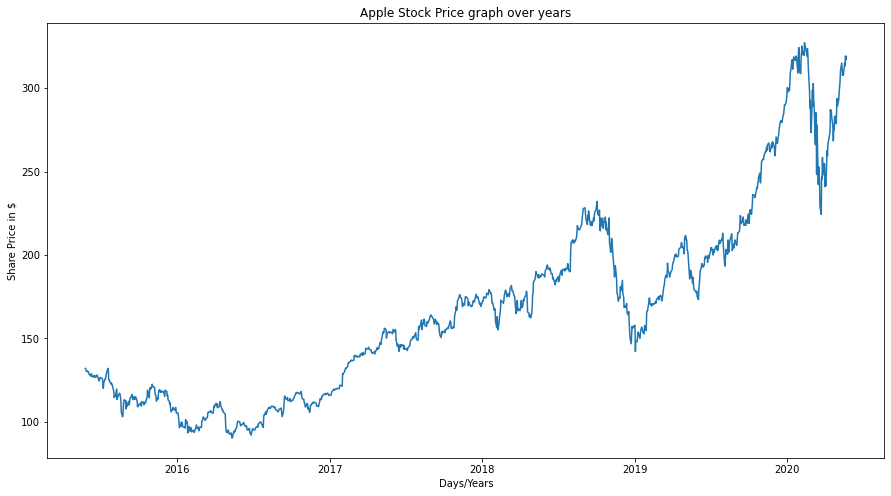

In [8]:
plt.figure(figsize=(15,8))
plt.plot(df['date'], df['close'])
plt.xlabel('Days/Years')
plt.ylabel('Share Price in $')
plt.title('Apple Stock Price graph over years')

In [13]:
close_data = df['close'].values
close_data = close_data.reshape((-1,1))
print(close_data, close_data.shape)

[[132.045]
 [131.78 ]
 [130.28 ]
 ...
 [319.23 ]
 [316.85 ]
 [318.89 ]] (1258, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
close_data = scaler.fit_transform(close_data)

In [14]:
close_data, close_data.shape

(array([[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.96635143],
        [0.9563033 ],
        [0.96491598]]),
 (1258, 1))

In [20]:
split_percent=0.8
split = int(split_percent*len(close_data))
split

1006

In [21]:
close_train = close_data[:split]
date_train = df['date'][:split]

close_test = close_data[split:]
date_test = df['date'][split:]

print(len(close_test), len(close_train), len(close_data))

252 1006 1258


In [22]:
## Implement MinMaxScalar

Text(0.5, 1.0, 'Apple Stock Price graph over years')

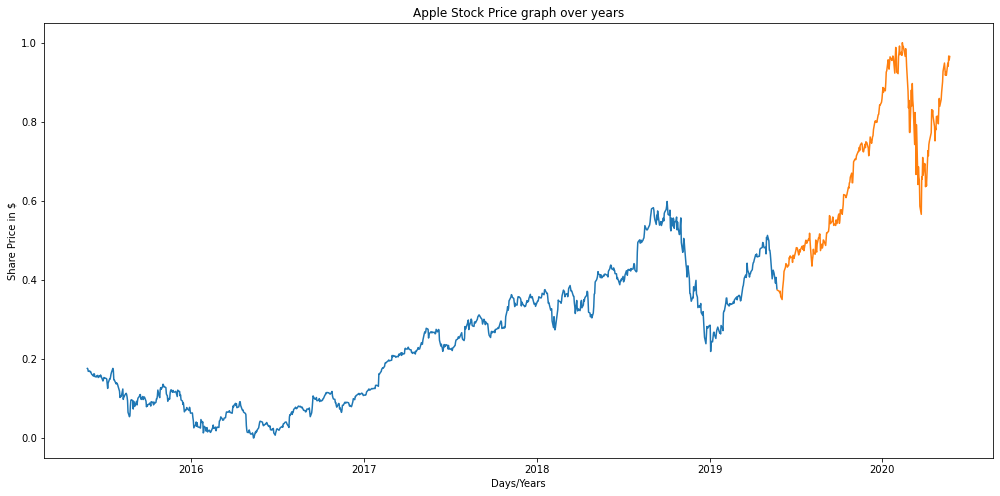

In [23]:
plt.figure(figsize=(17,8))
plt.plot(date_train, close_train)
plt.plot(date_test, close_test)
plt.xlabel('Days/Years')
plt.ylabel('Share Price in $')
plt.title('Apple Stock Price graph over years')

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
look_back_days = 10

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back_days, batch_size=40)
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back_days, batch_size=1)

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back_days,1)))
model.add(LSTM(50, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
#model.add(LSTM(50, return_sequences=True))
#model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)

In [29]:
trained_model = model.fit(train_generator, epochs=50, callbacks=[callback],verbose=1)

Epoch 1/50
25/25 [==============================] - 4s 7ms/step - loss: 0.0206
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 8.2002e-04
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 8.7064e-04
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 7.2215e-04
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 9.5354e-04
Epoch 8/50
25/25 [==============================] - 0s 7ms/step - loss: 6.4955e-04
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 7.5177e-04
Epoch 10/50
25/25 [==============================] - 0s 7ms/step - loss: 6.9349e-04
Epoch 11/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 12/50
25/25 [==============================] - 0s 7ms/step - loss: 7.3175e-04
Epoch 13/50
25/25

In [30]:
trained_model.history

{'loss': [0.0206330344080925,
  0.002787854755297303,
  0.0013151764869689941,
  0.0008200180600397289,
  0.0008706439402885735,
  0.0007221527048386633,
  0.0009535401477478445,
  0.0006495511042885482,
  0.0007517740596085787,
  0.0006934882258065045,
  0.0011106908787041903,
  0.0007317466079257429,
  0.0006814442458562553]}

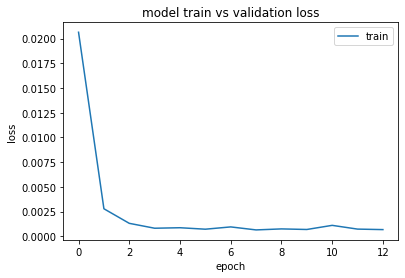

In [31]:
plt.plot(trained_model.history['loss'])
#plt.plot(trained_model.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [32]:
prediction = model.predict_generator(test_generator)

C:\Users\rutwi\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [44]:
close_train_1 = scaler.inverse_transform(close_train)
close_train_1 = close_train_1.reshape((-1))

close_test_1 = scaler.inverse_transform(close_test)
close_test_1 = close_test_1.reshape((-1))

prediction_1 = scaler.inverse_transform(prediction)
prediction_1 = prediction_1.reshape((-1))

In [45]:
trace1 = go.Scatter(
    x = date_train,
    y = close_train_1,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction_1,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test_1,
    mode = 'lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = " Apple Stock Price graph over years ",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [46]:
close_data_1 = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data_1[-look_back_days:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back_days:]
        x = x.reshape((1, look_back_days, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back_days-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 20
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [47]:
forecast_transformed = scaler.inverse_transform(np.array(forecast).reshape(-1,1))
forecast_transformed

array([[318.89      ],
       [295.0717954 ],
       [294.87685466],
       [294.77088528],
       [294.62993161],
       [293.9339446 ],
       [293.06266906],
       [291.14375646],
       [289.15696472],
       [286.33772182],
       [283.60106896],
       [280.518385  ],
       [279.71611802],
       [278.68271187],
       [277.4284444 ],
       [275.97124544],
       [274.4033617 ],
       [272.75534444],
       [271.14202912],
       [269.59938829],
       [268.18674559]])

In [48]:
forecast_transformed, forecast_dates

(array([[318.89      ],
        [295.0717954 ],
        [294.87685466],
        [294.77088528],
        [294.62993161],
        [293.9339446 ],
        [293.06266906],
        [291.14375646],
        [289.15696472],
        [286.33772182],
        [283.60106896],
        [280.518385  ],
        [279.71611802],
        [278.68271187],
        [277.4284444 ],
        [275.97124544],
        [274.4033617 ],
        [272.75534444],
        [271.14202912],
        [269.59938829],
        [268.18674559]]),
 [Timestamp('2020-05-22 00:00:00', freq='D'),
  Timestamp('2020-05-23 00:00:00', freq='D'),
  Timestamp('2020-05-24 00:00:00', freq='D'),
  Timestamp('2020-05-25 00:00:00', freq='D'),
  Timestamp('2020-05-26 00:00:00', freq='D'),
  Timestamp('2020-05-27 00:00:00', freq='D'),
  Timestamp('2020-05-28 00:00:00', freq='D'),
  Timestamp('2020-05-29 00:00:00', freq='D'),
  Timestamp('2020-05-30 00:00:00', freq='D'),
  Timestamp('2020-05-31 00:00:00', freq='D'),
  Timestamp('2020-06-01 00:00:00',

In [49]:
forecast_transformed = np.array(forecast_transformed).reshape((-1))

In [50]:
forecast_transformed

array([318.89      , 295.0717954 , 294.87685466, 294.77088528,
       294.62993161, 293.9339446 , 293.06266906, 291.14375646,
       289.15696472, 286.33772182, 283.60106896, 280.518385  ,
       279.71611802, 278.68271187, 277.4284444 , 275.97124544,
       274.4033617 , 272.75534444, 271.14202912, 269.59938829,
       268.18674559])